<a href="https://colab.research.google.com/github/saubhagyamaurya/MachineLearning/blob/main/MultipuleLinearRegression1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import numpy as np
import pandas as pd

data = pd.read_csv("Advertising.csv",index_col=0)
data

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


Discription of Dataset

In [55]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


Information of Dataset

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


Inslise the Independent Variable

In [57]:
X = data.iloc[:,:-1]
print(X)
print(X.shape)

        TV  Radio  Newspaper
1    230.1   37.8       69.2
2     44.5   39.3       45.1
3     17.2   45.9       69.3
4    151.5   41.3       58.5
5    180.8   10.8       58.4
..     ...    ...        ...
196   38.2    3.7       13.8
197   94.2    4.9        8.1
198  177.0    9.3        6.4
199  283.6   42.0       66.2
200  232.1    8.6        8.7

[200 rows x 3 columns]
(200, 3)


Inslize the Dependent Variable

In [58]:
y = data.iloc[:,3]
y
print(y.shape)

(200,)


Taking care missing value

In [59]:
from sklearn.impute import SimpleImputer
si = SimpleImputer()
X = si.fit_transform(X)

Spliting the Dataset Into test and train

In [60]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)


Fitting MRL to the Training Dataset

In [61]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

Predicting on the Dataset

In [62]:
y_pred = regressor.predict(X_test)
y_pred

array([16.4080242 , 20.88988209, 21.55384318, 10.60850256, 22.11237326,
       13.10559172, 21.05719192,  7.46101034, 13.60634581, 15.15506967,
        9.04831992,  6.65328312, 14.34554487,  8.90349333,  9.68959028,
       12.16494386,  8.73628397, 16.26507258, 10.27759582, 18.83109103,
       19.56036653, 13.25103464, 12.33620695, 21.30695132,  7.82740305,
        5.80957448, 20.75753231, 11.98138077,  9.18349576,  8.5066991 ,
       12.46646769, 10.00337695, 21.3876709 , 12.24966368, 18.26661538,
       20.13766267, 14.05514005, 20.85411186, 11.0174441 ,  4.56899622])

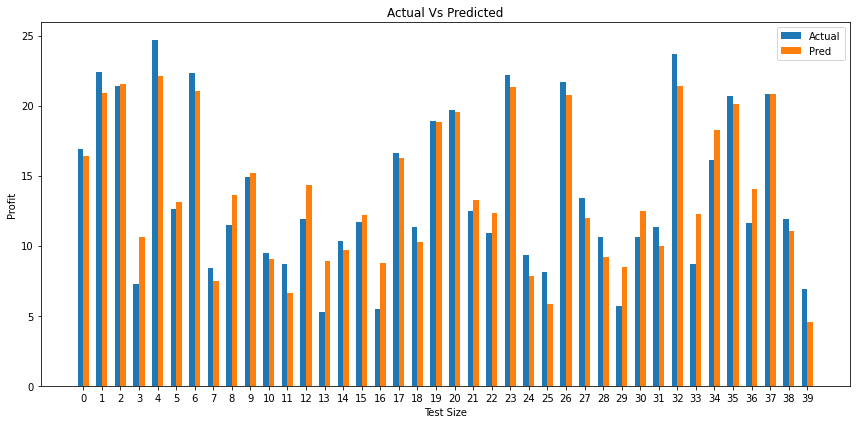

In [78]:
import matplotlib.pyplot as plt
x = np.arange(len(y_test))
width = 0.30

fig, ax = plt.subplots(figsize=(12,6))


rects1 = ax.bar(x-width/2, y_test, width, label = 'Actual')
rects2 = ax.bar(x+width/2, y_pred, width, label = 'Pred')

ax.set_ylabel('Profit')
ax.set_xlabel('Test Size')
ax.set_title('Actual Vs Predicted')
ax.legend()   

df = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})

#ax.bar_label(rects1,padding = 3)
#ax.bar_label(rects2,padding = 3)
plt.xticks(list(range(0,40)))
fig.tight_layout()
plt.show()

In [79]:
print(df.to_string())

     Actual  Predicted
96     16.9  16.408024
16     22.4  20.889882
31     21.4  21.553843
159     7.3  10.608503
129    24.7  22.112373
116    12.6  13.105592
70     22.3  21.057192
171     8.4   7.461010
175    11.5  13.606346
46     14.9  15.155070
67      9.5   9.048320
183     8.7   6.653283
166    11.9  14.345545
79      5.3   8.903493
187    10.3   9.689590
178    11.7  12.164944
57      5.5   8.736284
153    16.6  16.265073
83     11.3  10.277596
69     18.9  18.831091
125    19.7  19.560367
17     12.5  13.251035
149    10.9  12.336207
94     22.2  21.306951
66      9.3   7.827403
61      8.1   5.809574
85     21.7  20.757532
68     13.4  11.981381
126    10.6   9.183496
133     5.7   8.506699
10     10.6  12.466468
19     11.3  10.003377
56     23.7  21.387671
76      8.7  12.249664
151    16.1  18.266615
105    20.7  20.137663
136    11.6  14.055140
138    20.8  20.854112
165    11.9  11.017444
77      6.9   4.568996
